In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/a/Desktop/PAML_COVID_Dataset.csv')
df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,73,chest pain or pressure,headache,tiredness,Moderate,Covid
1,31/01/20,6:00 PM,Kerala,1,Female,0,15,loss of speech or movement,conjunctivitis,fever,Moderate,Covid
2,1/2/2020,6:00 PM,Kerala,2,Female,0,35,chest pain or pressure,aches and pains,fever,Moderate,Covid
3,2/2/2020,6:00 PM,Kerala,3,Female,0,28,difficulty breathing or shortness of breath,loss of taste or smell,dry cough,Mild,Covid
4,3/2/2020,6:00 PM,Kerala,3,Female,0,15,difficulty breathing or shortness of breath,aches and pains,fever,Mild,Covid


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3135 non-null   object
 1   Time                      3135 non-null   object
 2   State/UnionTerritory      3135 non-null   object
 3   ConfirmedIndianNational   3135 non-null   object
 4   Gender                    3135 non-null   object
 5   ConfirmedForeignNational  3135 non-null   object
 6   Age                       3135 non-null   int64 
 7   Serious symptoms          3135 non-null   object
 8   Less common symptoms      3135 non-null   object
 9   Most common symptoms      3135 non-null   object
 10  Severity                  3135 non-null   object
 11  Patient_Status            3135 non-null   object
dtypes: int64(1), object(11)
memory usage: 294.0+ KB


In [6]:
df['Patient_Status '].value_counts()

Covid    1580
flu      1555
Name: Patient_Status , dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Patient_Status '] = label_encoder.fit_transform(df['Patient_Status '])
df['Gender ']= label_encoder.fit_transform(df['Gender '])
df['Serious symptoms']= label_encoder.fit_transform(df['Serious symptoms'])
df['Less common symptoms']= label_encoder.fit_transform(df['Less common symptoms'])
df['Most common symptoms']= label_encoder.fit_transform(df['Most common symptoms'])
df['Severity']= label_encoder.fit_transform(df['Severity'])


In [8]:
df.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'Gender ', 'ConfirmedForeignNational', 'Age ', 'Serious symptoms',
       'Less common symptoms', 'Most common symptoms', 'Severity',
       'Patient_Status '],
      dtype='object')

In [9]:
X = df[['Gender ','Age ','Serious symptoms','Less common symptoms','Most common symptoms','Severity']].values  #.astype(float)
X[0:5]

array([[ 1, 73,  0,  4,  2,  1],
       [ 0, 15,  2,  2,  1,  1],
       [ 0, 35,  0,  1,  1,  1],
       [ 0, 28,  1,  5,  0,  0],
       [ 0, 15,  1,  1,  1,  0]], dtype=int64)

In [10]:
y = df['Patient_Status '].values
y[0:5]

array([0, 0, 0, 0, 0])

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(object))
X[0:5]

array([[ 1.02487058,  0.74652258, -1.20803325,  0.49359234,  1.2016007 ,
        -0.00313437],
       [-0.97573295, -1.35062851,  1.24480628, -0.51318189, -0.00539007,
        -0.00313437],
       [-0.97573295, -0.62747296, -1.20803325, -1.01656901, -0.00539007,
        -0.00313437],
       [-0.97573295, -0.8805774 ,  0.01838652,  0.99697946, -1.21238084,
        -1.2314165 ],
       [-0.97573295, -1.35062851,  0.01838652, -1.01656901, -0.00539007,
        -1.2314165 ]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2508, 6) (2508,)
Test set: (627, 6) (627,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [15]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 0, 1])

In [16]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6822169059011164
Test set Accuracy:  0.48963317384370014


In [17]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.49122807, 0.49282297, 0.49760766, 0.48963317, 0.49282297,
       0.49122807, 0.51196172, 0.49122807, 0.49441786])

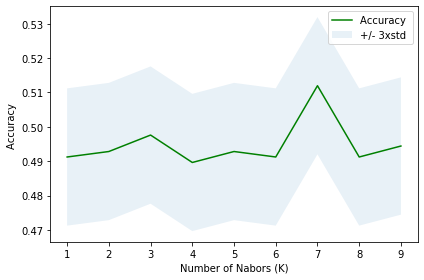

In [18]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()